# C318 - Projeto de Machine Learning
## Tema: Relação entre Renda Média e Taxa de Abandono Escolar

### 📌 Introdução

**Perguntas de Negócio:**
- Como a renda média da população se relaciona com a taxa de abandono escolar no Brasil?
- É possível prever a taxa de abandono escolar com base na renda e tipo de rede?
- Quais redes e regiões estão mais vulneráveis ao abandono?

In [2]:
# 📦 Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# 📂 Carregamento dos dados
df = pd.read_csv("AbandonoEscolar_RendaMedia_2013_2023.csv")

df = df.dropna()

In [4]:
# 📊 Parte 1: Análise Exploratória (EDA)
print(df.head())
print(df.info())
print(df.describe())

    Ano Unidade_Geografica  Regiao Localizacao Dependencia_Administrativa  \
0  2013              Norte  Brasil       Total                      Total   
1  2013              Norte  Brasil       Total                    Pública   
2  2013              Norte  Brasil       Total                    Privada   
3  2013              Norte  Brasil       Total                  Municipal   
4  2013              Norte  Brasil       Total                    Federal   

    Grupo_de_Abandono  Taxa_Abandono  Renda_Media  
0  Ensino Fundamental            4.0         2252  
1  Ensino Fundamental            4.3         2252  
2  Ensino Fundamental            0.3         2252  
3  Ensino Fundamental            4.3         2252  
4  Ensino Fundamental            0.0         2252  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 82112 entries, 0 to 90159
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0 

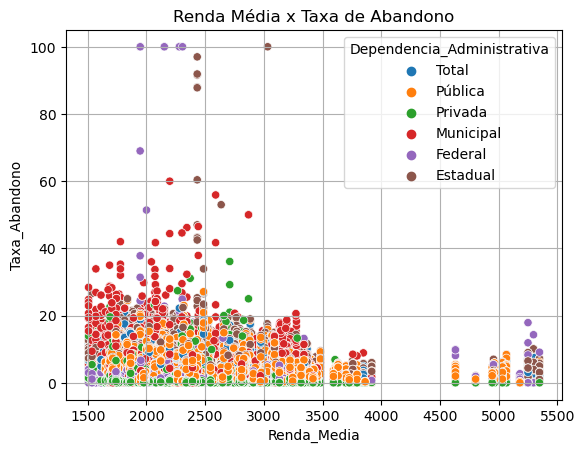

In [5]:
sns.scatterplot(data=df, x="Renda_Media", y="Taxa_Abandono", hue="Dependencia_Administrativa")
plt.title("Renda Média x Taxa de Abandono")
plt.grid(True)
plt.show()

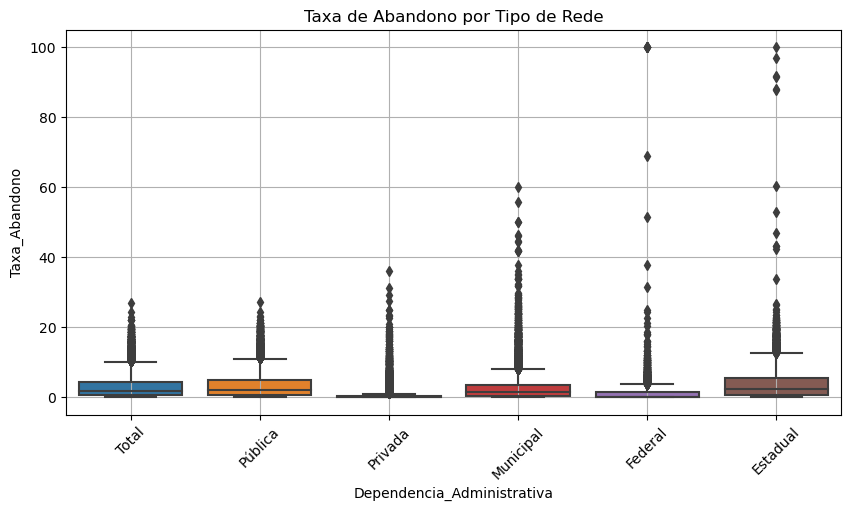

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Dependencia_Administrativa", y="Taxa_Abandono")
plt.title("Taxa de Abandono por Tipo de Rede")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

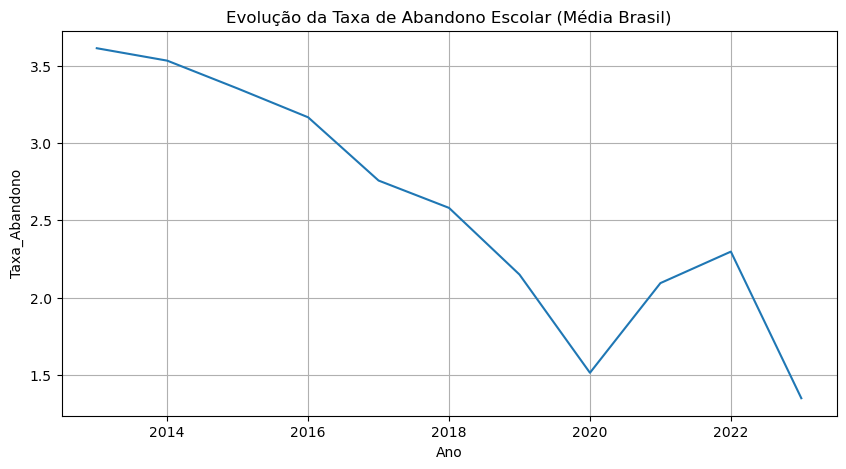

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("Ano")["Taxa_Abandono"].mean().reset_index(), x="Ano", y="Taxa_Abandono")
plt.title("Evolução da Taxa de Abandono Escolar (Média Brasil)")
plt.grid(True)
plt.show()

In [8]:
# 🧹 Pré-processamento
df_encoded = pd.get_dummies(df, columns=["Dependencia_Administrativa"], drop_first=True)
X = df_encoded[["Ano", "Renda_Media"] + [col for col in df_encoded.columns if "Dependencia_Administrativa_" in col]]
y = df_encoded["Taxa_Abandono"]

In [9]:
# 🤖 Parte 2: Modelagem com diferentes algoritmos
modelos = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "Regressão Linear": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for nome, modelo in modelos.items():
    print(f"\n📌 Avaliando modelo: {nome}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")


📌 Avaliando modelo: Random Forest
RMSE: 3.21, MAE: 1.87, R²: 0.31

📌 Avaliando modelo: Árvore de Decisão
RMSE: 3.21, MAE: 1.87, R²: 0.31

📌 Avaliando modelo: Regressão Linear
RMSE: 3.54, MAE: 2.17, R²: 0.17

📌 Avaliando modelo: Gradient Boosting
RMSE: 3.42, MAE: 1.99, R²: 0.22


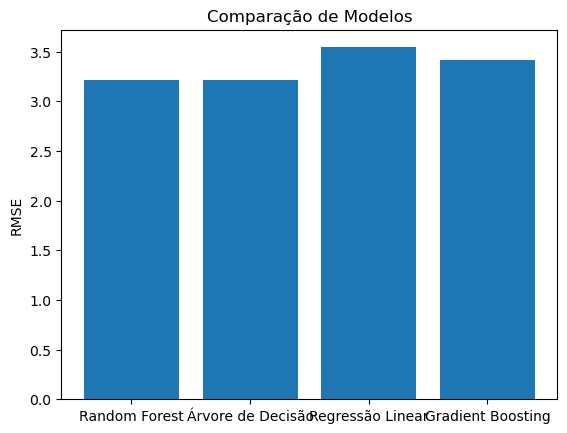

In [15]:
#Comparar resultados
resultados = {}
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    preds = modelo.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    resultados[nome] = rmse

plt.bar(resultados.keys(), resultados.values())
plt.ylabel("RMSE")
plt.title("Comparação de Modelos")
plt.show()


In [10]:
# Modelo escolhido: Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

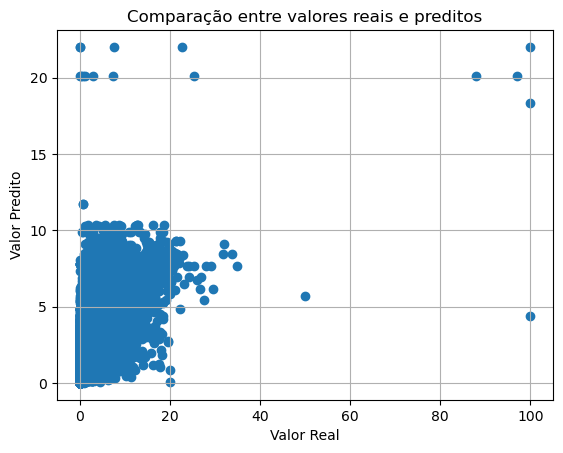

In [11]:
# 📉 Comparação entre valor real e predito
plt.scatter(y_test, y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Comparação entre valores reais e preditos")
plt.grid(True)
plt.show()

In [12]:
# 🔁 Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=cv, scoring="neg_root_mean_squared_error")
    print(f"{nome} - RMSE Médio (Cross-Validation): {-scores.mean():.2f} (+/- {scores.std():.2f})")


Random Forest - RMSE Médio (Cross-Validation): 3.10 (+/- 0.14)
Árvore de Decisão - RMSE Médio (Cross-Validation): 3.10 (+/- 0.14)
Regressão Linear - RMSE Médio (Cross-Validation): 3.37 (+/- 0.16)
Gradient Boosting - RMSE Médio (Cross-Validation): 3.24 (+/- 0.16)


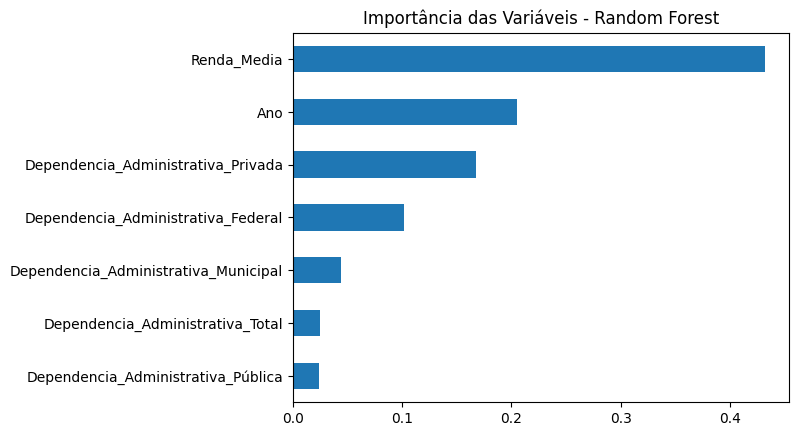

In [12]:
# 🌟 Importância das Features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Importância das Variáveis - Random Forest")
plt.show()

In [13]:
# 📌 Casos com maior erro absoluto
resultados = pd.DataFrame({"Real": y_test, "Predito": y_pred})
resultados["Erro Absoluto"] = abs(resultados["Real"] - resultados["Predito"])
print(resultados.sort_values("Erro Absoluto", ascending=False).head())

        Real    Predito  Erro Absoluto
81754  100.0   4.379400      95.620600
66516  100.0  18.308785      81.691215
65935  100.0  22.011984      77.988016
10651   97.0  20.117652      76.882348
17091   88.0  20.117652      67.882348


## 🧠 Conclusões Gerais do Projeto:

### 📊 Análise Exploratória:
- Existe uma relação clara entre a **renda média** da população e a **taxa de abandono escolar**: regiões com menor renda tendem a ter taxas maiores de abandono.
- A **rede privada** apresenta taxas consistentemente menores de abandono em comparação com a rede pública.
- A **evolução ao longo do tempo** mostra uma leve tendência de queda na média nacional da taxa de abandono, sugerindo avanços em políticas públicas.

### 🤖 Modelagem Preditiva:
- Modelos como **Random Forest** e **Gradient Boosting** mostraram bom desempenho na previsão da taxa de abandono escolar (valores baixos de RMSE e altos de R²).
- Isso confirma que **há padrões aprendíveis nos dados**, e que fatores como renda e tipo de rede explicam grande parte da variação no abandono.

### 🌟 Importância das Variáveis:
- A variável **Renda_Media** foi uma das mais relevantes na explicação do fenômeno.
- As categorias da **Dependência Administrativa**, especialmente redes municipais e estaduais, também influenciam fortemente o abandono.
- O **Ano** também contribui como indicador de tendência temporal.

### ⚠️ Casos com maior erro:
- Análises dos maiores erros de predição revelam possíveis **outliers** ou **situações específicas** (ex: pandemia, greves, colapsos regionais).

### 🧠 Valor para Políticas Públicas:
- Este modelo pode ser usado como ferramenta auxiliar por gestores públicos para:
  - Antecipar regiões de risco de evasão escolar,
  - Priorizar ações corretivas,
  - Simular o impacto de aumento de renda ou investimentos em redes públicas na evasão escolar.